1. Load the Datasets
Loads two CSV files:

covid_df: Contains confirmed COVID-19 cases per country over time.

happiness_df: Contains happiness scores and related metrics for different countries.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load COVID-19 confirmed dataset
covid_df = pd.read_csv("covid19_Confirmed_dataset.csv")

# Load Happiness dataset
happiness_df = pd.read_csv("worldwide_happiness_report.csv")  # Adjust if file is local or from another path


print(covid_df.head())


print(happiness_df.head())



  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531   

2. Clean and Prepare COVID Data
Removes Lat and Long columns.

Groups the data by country to get total cases.

Extracts the latest confirmed total from the last column and stores it in a new column



In [18]:
df = covid_df.drop(["Lat", "Long"], axis=1, inplace=True)
covid_grouped = covid_df.groupby("Country/Region").sum()

In [19]:
# Use total confirmed cases (last column)
covid_grouped["Total_confirmed"] = covid_grouped.iloc[:, -1]

# Keep only needed column
covid_data = covid_grouped[["Total_confirmed"]]

In [21]:
covid_data

,Total_confirmed
Country/Region,
Afghanistan,2171
Albania,773
Algeria,4006
Andorra,745
Angola,27
...,...
West Bank and Gaza,344
Western Sahara,6
Yemen,6


In [22]:
covid_data = pd.DataFrame(covid_grouped["Total_confirmed"])

In [23]:
covid_data

,Total_confirmed
Country/Region,
Afghanistan,2171
Albania,773
Algeria,4006
Andorra,745
Angola,27
...,...
West Bank and Gaza,344
Western Sahara,6
Yemen,6


 3. Clean Happiness Data
 drop useless columns



In [24]:
useless = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_df.drop(useless, axis=1, inplace = True)
happiness_df.head()


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [25]:
happiness_df.set_index("Country or region", inplace = True)
happiness_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


4. Merge Datasets
Merges the two datasets using the country name.

Drops duplicate Country/Region column after merging.

In [26]:
merged_df = covid_data.join(happiness_df, how='inner')
merged_df


,Total_confirmed,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2171,0.350,0.517,0.361,0.000
Albania,773,0.947,0.848,0.874,0.383
Algeria,4006,1.002,1.160,0.785,0.086
Argentina,4428,1.092,1.432,0.881,0.471
Armenia,2066,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,333,0.960,1.427,0.805,0.154
Vietnam,270,0.741,1.346,0.851,0.543
Yemen,6,0.287,1.163,0.463,0.143
Zambia,106,0.578,1.058,0.426,0.431


5. Correlation Heatmap

In [27]:
merged_df.corr()

,Total_confirmed,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Total_confirmed,1.000000,0.329048,0.241549,0.341900,0.029678
GDP per capita,0.329048,1.000000,0.759468,0.863062,0.394603
Social support,0.241549,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.341900,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.029678,0.394603,0.456246,0.427892,1.000000


In [28]:
merged_df

,Total_confirmed,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2171,0.350,0.517,0.361,0.000
Albania,773,0.947,0.848,0.874,0.383
Algeria,4006,1.002,1.160,0.785,0.086
Argentina,4428,1.092,1.432,0.881,0.471
Armenia,2066,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,333,0.960,1.427,0.805,0.154
Vietnam,270,0.741,1.346,0.851,0.543
Yemen,6,0.287,1.163,0.463,0.143
Zambia,106,0.578,1.058,0.426,0.431


6. GDP vs COVID-19 Plot

Plots GDP vs total confirmed COVID cases.

Colors the points by Happiness Score (Score) to explore relationships visually.

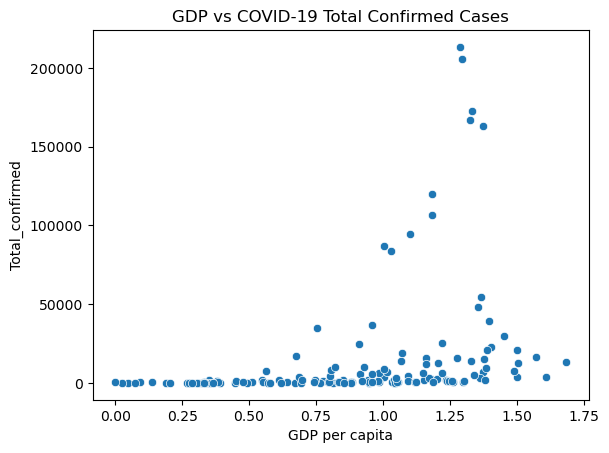

In [29]:
sns.scatterplot(data=merged_df, x='GDP per capita', y='Total_confirmed')
plt.title("GDP vs COVID-19 Total Confirmed Cases")
plt.show()


7. Life Expentancy vs COVID-19 Plot

Colors the points by Happiness Score (Score) to explore relationships visually.

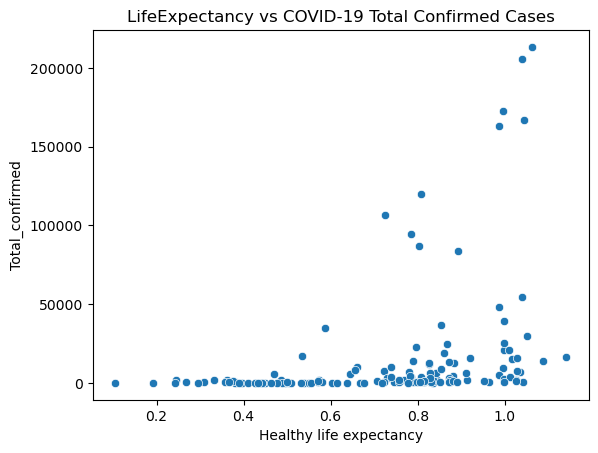

In [30]:
sns.scatterplot(data=merged_df, x='Healthy life expectancy', y='Total_confirmed')
plt.title("LifeExpectancy vs COVID-19 Total Confirmed Cases")
plt.show()

8. Social support vs COVID-19 Plot

Colors the points by Happiness Score (Score) to explore relationships visually.

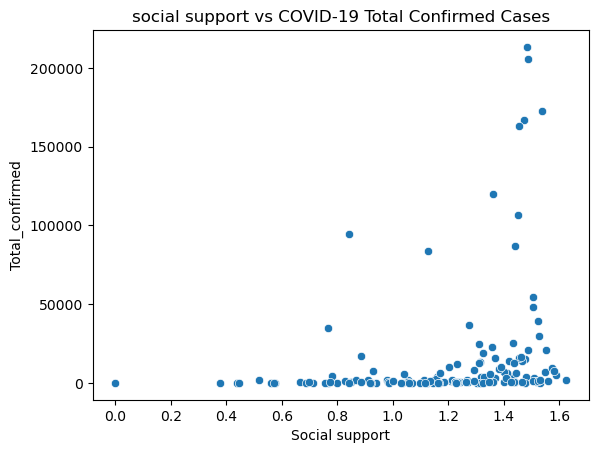

In [32]:
sns.scatterplot(data=merged_df, x='Social support', y='Total_confirmed')
plt.title("social support vs COVID-19 Total Confirmed Cases")
plt.show()

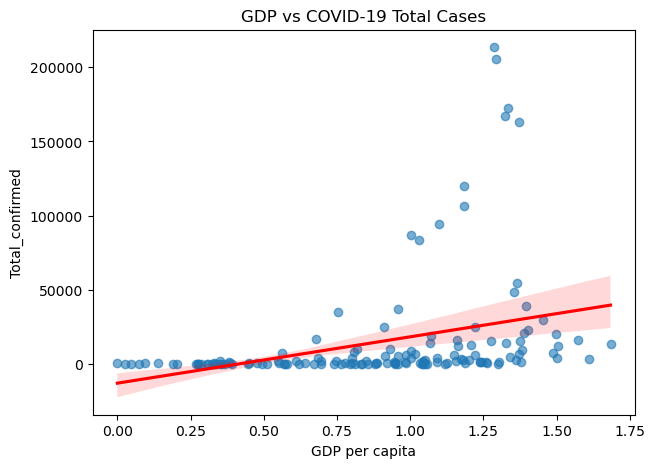

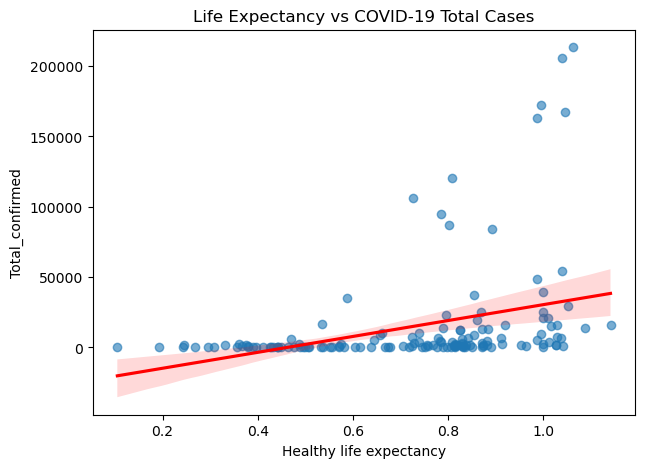

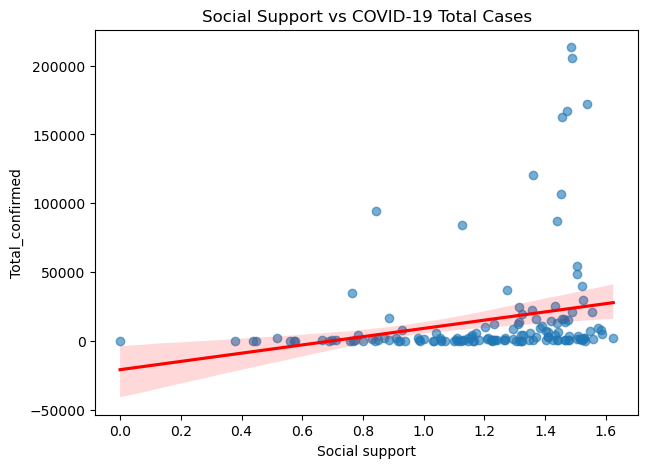

In [33]:
def plot_scatter(x, y, title):
    plt.figure(figsize=(7,5))
    sns.regplot(data=merged_df, x=x, y=y, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
    plt.title(title)
    plt.show()

plot_scatter("GDP per capita", "Total_confirmed", "GDP vs COVID-19 Total Cases")
plot_scatter("Healthy life expectancy", "Total_confirmed", "Life Expectancy vs COVID-19 Total Cases")
plot_scatter("Social support", "Total_confirmed", "Social Support vs COVID-19 Total Cases")

Key Insight
The latest COVID-19 data used is from 2020-05-01

Top 10 countries by confirmed cases are generally large and globally connected economies.
    
Happiness factors like GDP per Capita and Social Support are strongly correlated with Happiness Score.
    
Surprisingly, wealthier countries do not always show fewer COVID-19 cases — likely due to higher mobility & testing.
    
Healthy Life Expectancy and Social Support may have helped some nations manage better outcomes.